# Matplotlib Challenge Homework
Jeremy Strauch
UPenn Data Analytics Boot Camp Fall 2020 Cohort
February 3rd 2021

## Insights and observations from the Assignment


(1) The study measured tumor growth for 249 mice who received injections from nine potential treatment drugs.There was one placebo group.
(2) The data set consisted of five duplicate entries for g989, which were removed prior to data analysis
(3) A total of 1888 separate observations of tumore growth vs time were made through the study
(4) The distribution of mouse gender was roughly 50:50 male:female
(5) Mean tumor volume was markedly smaller for regimens using Ramicane and Capomulin
(6) The placebo group out performed Stelasyn, Naftisol and Ketapril
(7) Tumor volume data for Capomulin, Ramicane, Infubinol and Ceftamin were tightly grouped with no outliers from the distribution
(8) Steady tumor size reduction va time was observed with mouse s185 using Capomulin
(9) A positive, direct correlation was calculated between mouse weight and tumor volume for mice using Capomulin (pearson correlation 0.84 and r2 = 0.71 for linear fit regression)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

In [2]:
# Import study data files
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_path)
study_df = pd.read_csv(study_path)
print(mouse_df.head(4))
print(study_df.head(4))



  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0


In [3]:
# Combine the data sets into one data frame
data_df = pd.merge(mouse_df, study_df, on='Mouse ID')

# Get a sense of the data frame size and data
print(data_df.head(5))
print(data_df.shape)
print(data_df.dtypes)

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
(1893, 8)
Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object


In [4]:
# Check the number of mice in the study

num_mice = len(mouse_df['Mouse ID'].value_counts())

print(f'\nThe number of mice in the study is:  {num_mice}\n')


The number of mice in the study is:  249



In [5]:
# First, determine where duplications are occurring in Timepoint
# Use groupby using TimePoint to identify duplications

dupl = data_df.groupby('Timepoint')

# looking for instances where [mouse] was in each time point series more than once
filt = dupl['Mouse ID'].value_counts()>1 

# make a new series 'test' to understand where filt was true (mulit-index series for timepoint and mice)
test = filt[filt == True] 

# use the primary index of Timepoints to determine where duplications occured
times_dupl = list(test.index.get_level_values(0)) 

# use the second index to find Mouse IDs that correspond with duplicate Timepoints
mice_dupl = list(test.index.get_level_values(1)) 

# print the mice and time increments representing duplications

print(f'\nMice: {mice_dupl} were duplicated at time points: {times_dupl}\n')


Mice: ['g989', 'g989', 'g989', 'g989', 'g989'] were duplicated at time points: [0, 5, 10, 15, 20]



In [6]:
# Find indexes in the original dataframe for the duplications
# Show the study data for the duplications

index_dupl=[]

print(f' \nThere were {len(mice_dupl)} duplicated entries in the original data file:\n ')
for x in range(0,len(mice_dupl)):
    
    # set up the filter for the duplications
    filt = (data_df['Mouse ID'] == mice_dupl[x]) & (data_df['Timepoint']==times_dupl[x]) 
    
    # print the study data for each duplication
    print(f' \nSet {x+1} duplications:\n\n {data_df.loc[filt]}')
    
    # save the index pairs for each duplication
    index_dupl.append(data_df.loc[filt].index[0]) # append one of the index pairs to a series

 
There were 5 duplicated entries in the original data file:
 
 
Set 1 duplications:

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0  
 
Set 2 duplications:

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   

     Tumor Volume (mm3)  Metastatic Sites  
910           48.786801                 0  
911           47.570392                 0  
 
Set 3 duplications:

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
912     g989     Propriva  Female          21          26         10   
913     g989     Propri

In [7]:
# make a clean data frame that removes one of the duplication rows using drop method

clean_df = data_df.drop(data_df.index[[index_dupl]], axis = 0)

# determine the number of mice in the study to make sure no mice were removed when cleaning the data frame

num_mice = len(clean_df['Mouse ID'].value_counts())

print(f' \nThe cleaned data frame has {len(clean_df)} data sets using {num_mice} mice\n')

 
The cleaned data frame has 1888 data sets using 249 mice



C:\Users\jtstr\anaconda\envs\PythonData\lib\site-packages\pandas\core\indexes\base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen

# Use groupby method and aggregate functions to generate the statistics data series

drug_gb = clean_df.groupby(['Drug Regimen'])
dtv_mean = drug_gb['Tumor Volume (mm3)'].mean()

dtv_med = drug_gb['Tumor Volume (mm3)'].median()
dtv_var = drug_gb['Tumor Volume (mm3)'].var(ddof = 0)
dtv_stdv = drug_gb['Tumor Volume (mm3)'].std(ddof = 0)
dtv_sem = drug_gb['Tumor Volume (mm3)'].sem(ddof = 1)

# Use concat to join each data series into one dataframe

dtv_stat = pd.concat([dtv_mean,dtv_med,dtv_var, dtv_stdv, dtv_sem], axis='columns', sort = False)
dtv_stat.columns = ['Mean', 'Median', 'Variance', 'Std Dev', 'SEM']
dtv_stat.sort_values(by = 'Mean', ascending = True)


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Propriva,52.382993,50.783528,42.943152,6.553102,0.526358
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

dtv_agg = drug_gb['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,sem])
dtv_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


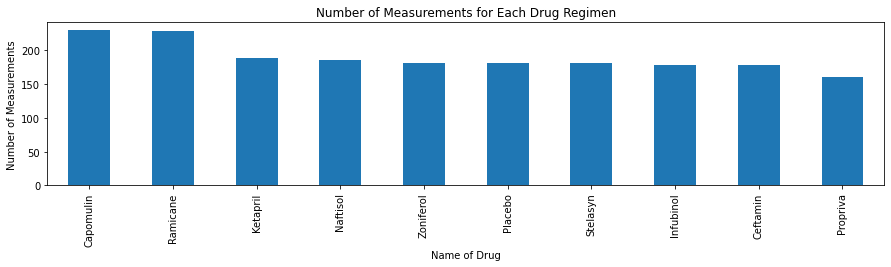

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

data = data_df['Drug Regimen'].value_counts()
drugs = data.index

drug_bar = data.plot(kind="bar", figsize=(15,3))

plt.title("Number of Measurements for Each Drug Regimen")
drug_bar.set_xlabel("Name of Drug")
drug_bar.set_ylabel("Number of Measurements")

fig1 = drug_bar.get_figure()

fig1.savefig("./Images/drug_mmts_pandas.png")

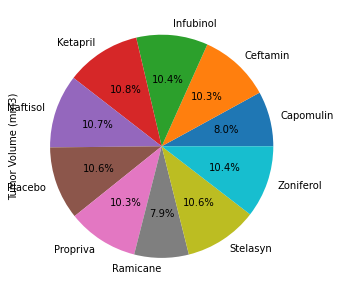

In [11]:
# Note I know I wasn't required to do this but wanted to try :)

drug_gb['Tumor Volume (mm3)'].mean().plot(kind='pie', figsize=(5,10), autopct='%1.1f%%')

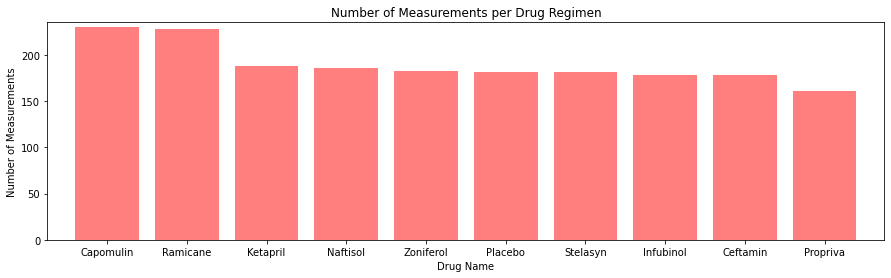

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(data))
plt.figure(figsize=(15,4))
plt.bar(x_axis, data, color='r', alpha=0.5, align="center")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data)+5)
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Number of Measurements")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)

plt.savefig("./Images/drug_regimen_mmts_pyplot.png")

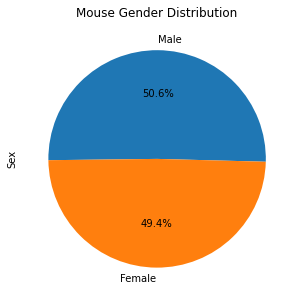

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = data_df['Sex'].value_counts()

genders = sex.index
drug_pie = sex.plot(kind="pie", figsize=(15,5), title = "Mouse Gender Distribution", autopct='%1.1f%%', startangle=-1.5)

plt.savefig("./Images/mouse_gen_pie_pandas.png")

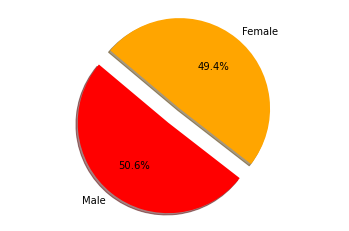

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The colors of each section of the pie chart
colors = ["red", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0.1)

plt.pie(sex, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.savefig("./Images/mouse_gen_pie_pyplot.png")

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# parse initial data frame by filtering on Timepoint = 45 and setting index to Mouse ID
# final_list = data_df[data_df.loc[:,'Timepoint']==45].sort_values('Drug Regimen',ascending = True).set_index('Mouse ID')
final_list = data_df[data_df.loc[:,'Timepoint']==45].set_index('Mouse ID')

# filter data frame to include only the four drugs of interest
filt = (final_list['Drug Regimen']=='Capomulin') |(final_list['Drug Regimen']=='Ramicane')|(final_list['Drug Regimen']=='Infubinol') | (final_list['Drug Regimen']=='Ceftamin')
final_list = final_list.loc[filt]

# remove extraneous columns, sort by tumor volume and display only the top 10 
short_df = final_list[['Drug Regimen', 'Tumor Volume (mm3)']].sort_values('Tumor Volume (mm3)',ascending = False).head(10)
print(short_df)

         Drug Regimen  Tumor Volume (mm3)
Mouse ID                                 
c139        Infubinol           72.226731
k210         Ceftamin           68.923185
y769         Ceftamin           68.594745
a203        Infubinol           67.973419
l471         Ceftamin           67.748662
y163        Infubinol           67.685569
w151         Ceftamin           67.527482
k483        Infubinol           66.196912
a685        Infubinol           66.083066
a251        Infubinol           65.525743


In [16]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# create new dataframe to narrow the list to Timepoint = 45
new_list = data_df[data_df.loc[:,'Timepoint']==45]


# create blank library for stats data
blank_df = pd.DataFrame({'Drug':0, '1st Quartile':0,'2nd Quartile':0,
                         '3rd Quartile':0, 'IQR':0, 'Lower Bound':0,'Upper Bound':0}, index=[0])

# create library of stats for each drug; use for loop and variable dataframe assignment
for drug in drug_list:
    vol = new_list[new_list.loc[:,'Drug Regimen']==drug]['Tumor Volume (mm3)']
    tv_qrt = vol.quantile([0.25,0.5,0.75])
    tv_1qrt = tv_qrt[0.25]
    tv_2qrt = tv_qrt[0.5]
    tv_3qrt = tv_qrt[0.75]
    tv_qrng = tv_3qrt-tv_1qrt
    tv_lower_bound = tv_1qrt - (1.5*tv_qrng)
    tv_upper_bound = tv_3qrt + (1.5*tv_qrng)
    vars()[drug]=pd.DataFrame({'Drug':drug, '1st Quartile':tv_1qrt, '2nd Quartile': tv_2qrt,
                               '3rd Quartile': tv_3qrt, 'IQR': tv_qrng, 'Lower Bound': tv_lower_bound,
                               'Upper Bound': tv_upper_bound}, index=[drug])
    
# append dataframes together & drop blank row
qrtile_df = blank_df.append([Capomulin, Ramicane, Infubinol, Ceftamin])
qrtile_df.drop(([0]), inplace = True)

# retrieve tumor volume data for each drug
tv_cap_vol = new_list[new_list.loc[:,'Drug Regimen']=='Capomulin'][['Tumor Volume (mm3)']]
tv_ram_vol = new_list[new_list.loc[:,'Drug Regimen']=='Ramicane'][['Tumor Volume (mm3)']]
tv_inf_vol = new_list[new_list.loc[:,'Drug Regimen']=='Infubinol'][['Tumor Volume (mm3)']]
tv_cef_vol = new_list[new_list.loc[:,'Drug Regimen']=='Ceftamin'][['Tumor Volume (mm3)']]

# set up filters for each drug tumor volume series to test for outliers
filt1 = (tv_cap_vol.loc[:,'Tumor Volume (mm3)']>qrtile_df.loc['Capomulin','Upper Bound']) | (tv_cap_vol.loc[:,'Tumor Volume (mm3)']<qrtile_df.loc['Capomulin','Lower Bound'])
filt2 = (tv_ram_vol.loc[:,'Tumor Volume (mm3)']>qrtile_df.loc['Ramicane','Upper Bound']) | (tv_cap_vol.loc[:,'Tumor Volume (mm3)']<qrtile_df.loc['Ramicane','Lower Bound'])
filt3 = (tv_inf_vol.loc[:,'Tumor Volume (mm3)']>qrtile_df.loc['Infubinol','Upper Bound']) | (tv_inf_vol.loc[:,'Tumor Volume (mm3)']<qrtile_df.loc['Infubinol','Lower Bound'])
filt4 = (tv_cef_vol.loc[:,'Tumor Volume (mm3)']>qrtile_df.loc['Ceftamin','Upper Bound']) |(tv_cef_vol.loc[:,'Tumor Volume (mm3)']<qrtile_df.loc['Ceftamin','Lower Bound'])

# apply filter to the date series
cap_num_out = tv_cap_vol[filt1]
ram_num_out = tv_ram_vol[filt2]
inf_num_out = tv_inf_vol[filt3]
cef_num_out = tv_cef_vol[filt4]

# Make outlier dataframe and merge with quartile dataframe
outlier_df = pd.DataFrame({'Drug': drug_list,
                          'Num Outliers':[cap_num_out['Tumor Volume (mm3)'].count(),
                                         ram_num_out['Tumor Volume (mm3)'].count(),
                                         inf_num_out['Tumor Volume (mm3)'].count(),
                                         cef_num_out['Tumor Volume (mm3)'].count()]})
qrtile_df = qrtile_df.merge(outlier_df, how='left').reset_index(drop=True)

# print results

# print quartile statistics and outlier count dataframe
print(f'\n The summary quartile data is shown in the below table:\n\n {qrtile_df}\n')

# print number of outliers for each drug regimen
print(f"The number of outliers for Capomulin is : {cap_num_out['Tumor Volume (mm3)'].count()}")
print(f"The number of outliers for Ramicane is : {ram_num_out['Tumor Volume (mm3)'].count()}")
print(f"The number of outliers for Infubinol is : {inf_num_out['Tumor Volume (mm3)'].count()}")
print(f"The number of outliers for Ceftamin is : {cef_num_out['Tumor Volume (mm3)'].count()}")



 The summary quartile data is shown in the below table:

         Drug  1st Quartile  2nd Quartile  3rd Quartile       IQR  Lower Bound  \
0  Capomulin     32.377357     37.311846     40.159220  7.781863    20.704562   
1   Ramicane     30.981175     34.848627     38.508305  7.527130    19.690480   
2  Infubinol     62.754451     66.083066     67.685569  4.931117    55.357776   
3   Ceftamin     61.433892     64.299830     67.527482  6.093590    52.293507   

   Upper Bound  Num Outliers  
0    51.832015             0  
1    49.799000             0  
2    75.082244             0  
3    76.667868             0  

The number of outliers for Capomulin is : 0
The number of outliers for Ramicane is : 0
The number of outliers for Infubinol is : 0
The number of outliers for Ceftamin is : 0


C:\Users\jtstr\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


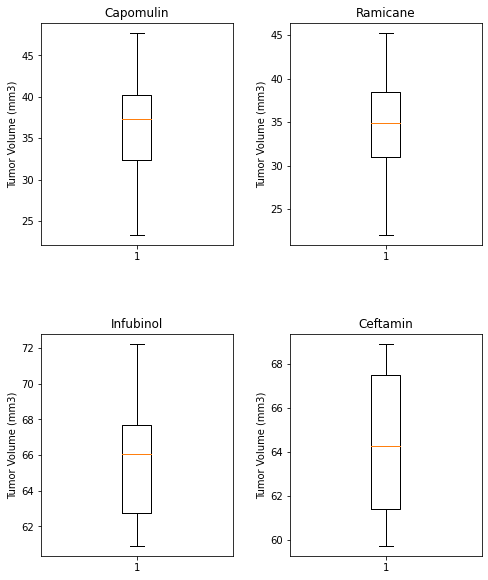

In [17]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens
#and highlight any potential outliers in the plot by changing their color and style.

fig, axs = plt.subplots(2,2)
axs[0, 0].boxplot(tv_cap_vol['Tumor Volume (mm3)'])
axs[0, 0].set_title('Capomulin')
axs[0, 0].set_ylabel('Tumor Volume (mm3)')

axs[0, 1].boxplot(tv_ram_vol['Tumor Volume (mm3)'])
axs[0, 1].set_title('Ramicane')
axs[0, 1].set_ylabel('Tumor Volume (mm3)')

axs[1, 0].boxplot(tv_inf_vol['Tumor Volume (mm3)'])
axs[1, 0].set_title('Infubinol')
axs[1, 0].set_ylabel('Tumor Volume (mm3)')

axs[1, 1].boxplot(tv_cef_vol['Tumor Volume (mm3)'])
axs[1, 1].set_title('Ceftamin')
axs[1, 1].set_ylabel('Tumor Volume (mm3)')

fig.subplots_adjust(left=0.18, right=1.2, bottom=0.05, top=1.9,
                    hspace=0.4, wspace=0.3)
plt.show()
fig.savefig("./Images/tumor_BW.png")

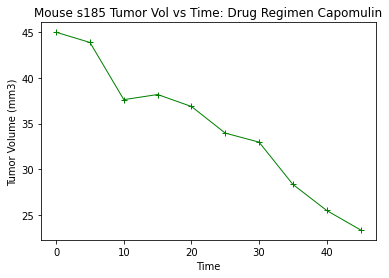

In [18]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
filt = (data_df.loc[:,'Drug Regimen'] == 'Capomulin') & (data_df.loc[:,'Mouse ID'] == 's185')
cap_s185_df = data_df[filt]

time = cap_s185_df['Timepoint']
tumorVol = cap_s185_df['Tumor Volume (mm3)']
plt.plot(time, tumorVol, linewidth=1, marker="+", color="green")
plt.title("Mouse s185 Tumor Vol vs Time: Drug Regimen Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("./Images/tumorvol_time_s185.png")

The correlation between both factors is 0.84
The r-squared is: 0.71


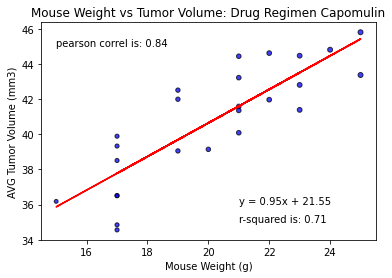

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

# filter the dataframe for Capomulin and group by Mouse ID
filt = data_df.loc[:,'Drug Regimen'] == 'Capomulin'
cap_df = data_df[filt]
x = cap_df.groupby('Mouse ID')
cap_avg_tumvol = x.mean()

# set x and y axes
x_axis = cap_avg_tumvol['Weight (g)']
y_axis = cap_avg_tumvol['Tumor Volume (mm3)']

# make scatter plot
plt.scatter(x_axis,y_axis,marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title('Mouse Weight vs Tumor Volume: Drug Regimen Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('AVG Tumor Volume (mm3)')

# find pearson correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# add regression to plot
plt.plot(x_axis,regress_values,"r-")

# annotate plot to include pearson correlation coefficient, r2 and regression model
message1 = f'r-squared is: {round(rvalue**2,2)}'
message2 = f'pearson correl is: {round(correlation[0],2)}'
plt.annotate(line_eq,(21,36),fontsize=10,color="black")
plt.annotate(message1,(21,35),fontsize=10,color="black")
plt.annotate(message2,(15,45),fontsize=10,color="black")

# add output messages
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {round(rvalue**2,2)}")

plt.savefig("./Images/mouse_tumor_cap.png")
plt.show()
